# Analysis

# Part 1: Descriptive Statistics

In [11]:
import os

ROOT_PATH = os.getcwd()
print(ROOT_PATH)

# Public paths
SPONSOR_DOCTYPE_PATH = os.path.join(ROOT_PATH, 'data/results/desc_stats/sponsor_doctype.csv')
VENUE_PATH = os.path.join(ROOT_PATH, 'data/results/desc_stats/venue.csv')
AUTHORS_MULTI_SPONS_CONTRIB_PATH = os.path.join(ROOT_PATH, 'data/results/desc_stats/authors_contrib_sponsors.csv')

CODING_PATH = os.path.join(ROOT_PATH, 'data/results/analysis/in_depth/coding.xlsx')

# Private (upon request for reproductibility)
PRIV_DATASET_PATH = os.path.join(ROOT_PATH, 'data/private/dataset_N880.xlsx')
#print(PRIV_DATASET_PATH)

/home/jovyan/work


In [2]:
from dataset_analysis.analyzer_utils import count_with_percentage
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 500)

## Sponsor and Document Type

In [24]:
sponsor_docttype_df = pd.read_csv(SPONSOR_DOCTYPE_PATH)
sponsor_docttype_df

,Sponsor (clean),Document Type,DOI,Perc.,DOI.1,Perc..1
0,ACM,Article,71,8.1,NaN,NaN
1,ACM,Conference Paper,424,48.2,56.0,56.0
2,ACM/IEEE,Conference Paper,6,0.7,3.0,3.0
3,IEEE,Article,133,15.1,30.0,30.0
4,IEEE,Conference Paper,246,28.0,11.0,11.0


### Private

In [25]:
df = pd.read_excel(PRIV_DATASET_PATH)

# Full set
df_sponsor = count_with_percentage(df, col_name='Sponsor (clean)')
df_doc_type = count_with_percentage(df, col_name='Document Type')

df_spons_doc_type = df[['DOI', 'Sponsor (clean)', 'Document Type']].copy()
df_spons_doc_type_groups = df_spons_doc_type.pivot_table(values='DOI',
                                                         index=['Sponsor (clean)', 'Document Type'],
                                                         aggfunc='count')
df_spons_doc_type_groups["Perc."] = round(df_spons_doc_type_groups["DOI"]/df_spons_doc_type_groups["DOI"].sum()*100, 1)
# df_spons_doc_type_groups

In [26]:
# Top 100
df_spons_doc_type_top100 = df[['DOI', 'Sponsor (clean)', 'Document Type']].copy()
df_spons_doc_type_top100 = df_spons_doc_type_top100[df['Coded'] == 1]
df_spons_doc_type_top100_groups = df_spons_doc_type_top100.pivot_table(values='DOI',
                                                         index=['Sponsor (clean)', 'Document Type'],
                                                         aggfunc='count')
df_spons_doc_type_top100_groups["Perc."] = round(df_spons_doc_type_top100_groups["DOI"]/df_spons_doc_type_top100_groups["DOI"].sum()*100, 1)
# df_spons_doc_type_top100_groups

In [27]:
# Merge both sets
df_spons_doc_type_all_groups = pd.concat([df_spons_doc_type_groups, df_spons_doc_type_top100_groups], axis = 1)
df_spons_doc_type_all_groups

DOI  Perc.   DOI  Perc.
Sponsor (clean) Document Type                            
ACM             Article            71    8.1   NaN    NaN
                Conference Paper  424   48.2  56.0   56.0
ACM/IEEE        Conference Paper    6    0.7   3.0    3.0
IEEE            Article           133   15.1  30.0   30.0
                Conference Paper  246   28.0  11.0   11.0

## Main Venues

In [53]:
venue_df = pd.read_csv(VENUE_PATH)
venue_df

,Venue (sponsor),Nb,Perc.
0,ACM CHI,156,17.7
1,ACM ASSETS,141,16.0
2,ACM TACCESS,39,4.4
3,IEEE Access,35,4.0
4,IEEE EMBC,16,1.8
...,...,...,...
236,IEEE ICCCS,1,0.1
237,IEEE ICCE-Taiwan,1,0.1
238,IEEE ICCES,1,0.1
239,IEEE ICCPCT,1,0.1


### Private

In [33]:
df['Venue (clean)'].nunique()

240

In [51]:
df["Venue (sponsor)"] = df["Sponsor (clean)"] + ' ' + df['Venue (clean)']
df["Venue (sponsor)"] = df["Venue (sponsor)"].str.strip()
df_venue = count_with_percentage(df, col_name='Venue (sponsor)').set_index('Venue (sponsor)')
df_venue.to_csv(VENUE_PATH)

In [52]:
df_venue = df_venue.head(10)
df_venue

,Nb,Perc.
Venue (sponsor),,
ACM CHI,156,17.7
ACM ASSETS,141,16.0
ACM TACCESS,39,4.4
IEEE Access,35,4.0
IEEE EMBC,16,1.8
IEEE TNSRE,15,1.7
ACM UIST,14,1.6
ACM PACMHCI,13,1.5
IEEE ToH,11,1.2


## Authorship
Authors contributions to multiple communities (ACM, IEEE, ACM/IEEE)

In [3]:
authors_contrib_multiple_sponsors_df = pd.read_csv(AUTHORS_MULTI_SPONS_CONTRIB_PATH)
authors_contrib_multiple_sponsors_df

,Author(s) ID,ACM,ACM/IEEE,IEEE,All
0,13009001800,1,0,1,2
1,14031183900,2,0,1,3
2,14523706200,1,0,1,2
3,15724751900,6,0,3,9
4,15835267300,16,0,1,17
...,...,...,...,...,...
87,7403181182,0,1,1,2
88,8531922500,1,0,5,6
89,8684305800,2,0,1,3
90,8919148700,8,0,1,9


### Private

In [4]:
import pandas as pd
from dataset_analysis.analysis.authorship_analyzer import AuthorshipAnalyzer

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 500)

df = pd.read_excel(PRIV_DATASET_PATH)
auth_analyzer = AuthorshipAnalyzer(df=df)

auth_analyzer.prepare()

print(auth_analyzer.summary())
print(auth_analyzer.authors_per_paper_summary())
print(auth_analyzer.papers_per_author_summary())

authors_contrib_multiple_sponsors_df = auth_analyzer.authors_contrib_multiple_sponsors()
print(authors_contrib_multiple_sponsors_df)

{'Papers': 880, 'Authors': 2458}
         counts
mean   4.234091
std    1.914491
min    1.000000
25%    3.000000
50%    4.000000
75%    5.000000
max   15.000000
         counts
mean   1.515867
std    1.734268
min    1.000000
25%    1.000000
50%    1.000000
75%    1.000000
max   28.000000
Sponsor (clean)  ACM  ACM/IEEE  IEEE  All
Author(s) ID                             
13009001800        1         0     1    2
14031183900        2         0     1    3
14523706200        1         0     1    2
15724751900        6         0     3    9
15835267300       16         0     1   17
...              ...       ...   ...  ...
7403181182         0         1     1    2
8531922500         1         0     5    6
8684305800         2         0     1    3
8919148700         8         0     1    9
9133799500         4         0     3    7

[92 rows x 4 columns]


## Issue Addressed and Contribution Type (N=100)

In [6]:
RELEVANT_COLUMNS = ['DOI', 'Authors', 'Year', 'Theme', 'Category', 'Code']

In [12]:
df = pd.read_excel(CODING_PATH, sheet_name=0, usecols=RELEVANT_COLUMNS)
df = df.dropna(axis='rows', how='all')
df['Year'] = df['Year'].astype('int')
df.head(1)

,DOI,Authors,Year,Theme,Category,Code
0,10.1109/ICCV.2015.279,Antol et al.,2015,Research,Issue Addressed,Digital access


In [13]:
df_unique = df.groupby(['DOI', 'Authors']).size().reset_index(name='Freq')
df_unique

,DOI,Authors,Freq
0,10.1109/ACCESS.2020.2967400,Chang et al.,16
1,10.1109/ACCESS.2021.3058986,Jalal et al.,13
2,10.1109/ACCESS.2022.3146320,Masud et al.,14
3,10.1109/ACCESS.2022.3148036,Ashiq et al.,18
4,10.1109/CVPR.2018.00374,Zhou et al.,15
...,...,...,...
95,10.1145/3313831.3376472,Colley et al.,17
96,10.1145/3313831.3376516,Zhao et al.,15
97,10.1145/3313831.3376728,Gleason et al.,18
98,10.1145/3377811.3380327,Chen et al.,15


In [14]:
assert len(df_unique) == 100

### Issue Addressed

In [16]:
from dataset_analysis.analysis.category_analyzer import CategoryAnalyzer

df_issue_adr = df.loc[ df['Category'] == 'Issue Addressed' ]

analyzer = CategoryAnalyzer(filtered_df=df_issue_adr)
cat_groups = analyzer.count()
print(cat_groups)

cat_groups_matrix = analyzer.count_matrix()
#print(cat_groups_matrix)
print(cat_groups_matrix[["All"]].describe())

coding_combinations_df = analyzer.count_co_occurrences()
print(coding_combinations_df)

Index(['DOI', 'Authors', 'Year', 'Theme', 'Category', 'Code'], dtype='object')
100
166
                    Code  Nb  Perc.
1         Digital access  38   38.0
2  Increase independence  34   34.0
4        Physical access  30   30.0
3                  Other  25   25.0
6     User understanding  25   25.0
0  Communication support   8    8.0
5      Support education   6    6.0
Code          All
count  100.000000
mean     1.660000
std      0.669992
min      1.000000
25%      1.000000
50%      2.000000
75%      2.000000
max      3.000000
Index(['Communication support', 'Digital access', 'Increase independence', 'Other', 'Physical access', 'Support education', 'User understanding'], dtype='object', name='Code')
                                               Coding  Nb  Perc.
10                  Digital accessxUser understanding  14   14.0
5                                      Digital access  13   13.0
19                                    Physical access  11   11.0
11                         

### Contribution Type

In [17]:
df_contr_type = df.loc[ df['Category'] == 'Contribution type' ]

analyzer = CategoryAnalyzer(filtered_df=df_contr_type)
cat_groups = analyzer.count()
print(cat_groups)

cat_groups_matrix = analyzer.count_matrix()
#print(cat_groups_matrix)
print(cat_groups_matrix[["All"]].describe())

coding_combinations_df = analyzer.count_co_occurrences()
print(coding_combinations_df)

Index(['DOI', 'Authors', 'Year', 'Theme', 'Category', 'Code'], dtype='object')
100
191
      Code  Nb  Perc.
2     Emp.  93   93.0
0     Art.  73   73.0
1  Dataset   6    6.0
3  Method.   2    2.0
4    Theo.   2    2.0
Code          All
count  100.000000
mean     1.760000
std      0.570663
min      1.000000
25%      1.000000
50%      2.000000
75%      2.000000
max      3.000000
Index(['Art.', 'Dataset', 'Emp.', 'Method.', 'Theo.'], dtype='object', name='Code')
              Coding  Nb  Perc.
2          Art.xEmp.  59   59.0
6               Emp.  24   24.0
0               Art.   7    7.0
1  Art.xDatasetxEmp.   5    5.0
3  Art.xEmp.xMethod.   1    1.0
4    Art.xEmp.xTheo.   1    1.0
5       DatasetxEmp.   1    1.0
7       Emp.xMethod.   1    1.0
8         Emp.xTheo.   1    1.0


# Part 2: TAK Analysis
Process:
1.   Analyze Titles, Abstract, and Keywords (TAK) to see most important keywords as well as Multiword Expressions through collocations.
2.   Create a manually curated list and a stopword list. The curated list will serve to run a terms counter.
3.   Create a data visualization of the processing.

## 2.1 Automatic analysis to identify frequent terms or group of terms
Analyze 1- to 4- grams in the publications Titles, Abstract, and Keywords (TAK).

NLTK
- https://www.nltk.org/howto/collocations.html
- https://www.nltk.org/book/ch01.html
- https://notebook.community/mediagestalt/Collocation/Collocation
- https://tedboy.github.io/nlps/generated/generated/nltk.BigramAssocMeasures.html#methods

Other resources:
- https://pitt.libguides.com/textmining/collocation

### Private (Needs Title, Abstract, and Authors Keywords)

In [18]:
import os

ROOT_PATH = os.getcwd()
print(ROOT_PATH)

# Private paths
PRIV_DATASET_PATH = os.path.join(ROOT_PATH, 'data/private/dataset_N880.xlsx')
PRIV_TAK_OUT_FOLDER_PATH = os.path.join(ROOT_PATH, 'data/private/analysis/tak_auto')

/home/jovyan/work


In [19]:
import pandas as pd
from dataset_analysis.analyzer_utils import count_terms

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 500)

COLUMNS = ['Title', 'Abstract', 'Author Keywords']
COL_NAME_FILTER = 'VOS cluster' # Can be 'Cluster' depending of the dataset used 

# Launch analysis
count_terms(dataset_filepath=PRIV_DATASET_PATH,
            tak_columns=COLUMNS,
            cluster_col=COL_NAME_FILTER,
            cluster_values=['1', '2', '3', '4', '5'],
            out_folder_path=PRIV_TAK_OUT_FOLDER_PATH)

['Title', 'Abstract', 'Author Keywords', 'VOS cluster']
1 403
2 176
3 166
4 95
5 40


## 2.2. Count Keywords per Paper (after a manual selection of terms)

### Community of Focus (Human)

#### Public
Load a crosstab and print results.

                             DOI  BLV_IFL  BLV_MULTI_IFL  BLV_PFL  B_IFL  B_PFL  LV_IFL  LV_PFL  Totals
0    10.1109/ACCESS.2017.2766579        1              0        0      0      0       0       0       1
1    10.1109/ACCESS.2018.2817164        1              0        0      0      0       0       0       1
2    10.1109/ACCESS.2018.2852723        2              0        0      1      0       0       0       3
3    10.1109/ACCESS.2018.2870334        2              0        0      0      0       0       0       2
4    10.1109/ACCESS.2018.2886308        0              1        0      0      0       0       0       1
..                           ...      ...            ...      ...    ...    ...     ...     ...     ...
828      10.1145/3530190.3534837        1              0        0      0      0       0       0       1
829              10.1145/3546714        0              0        0      5      0       0       0       5
830      10.1145/3547522.3547685        1              0        

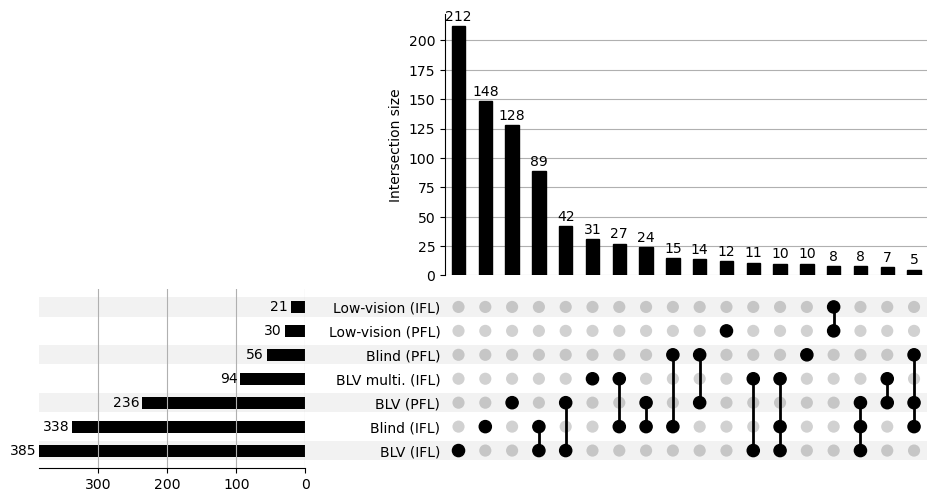

In [20]:
import os
import pandas as pd
from dataset_analysis.analyzer_utils import crosstab_analysis

ROOT_PATH = os.getcwd()

# Mapping table to rename groups that have naming limitations
RENAME_POPULATION_DICT = {
    'BLV_MULTI_IFL': 'BLV multi. (IFL)',
    'BLV_IFL': 'BLV (IFL)',
    'BLV_PFL': 'BLV (PFL)',
    'B_IFL': 'Blind (IFL)',
    'B_PFL': 'Blind (PFL)',
    'LV_IFL': 'Low-vision (IFL)',
    'LV_PFL': 'Low-vision (PFL)'
}

PUB_CROSSTAB_PATH = os.path.join(ROOT_PATH, 'data/results/analysis/community_of_focus/mentionBLV_crosstab.xlsx')
FIG_FOLDER_PATH = os.path.join(ROOT_PATH, 'data/results/analysis/community_of_focus/')
FIG_NAME = 'BLV_terms_TAK'

keyword_crosstab_df = pd.read_excel(PUB_CROSSTAB_PATH)
crosstab_analysis(keyword_crosstab_df=keyword_crosstab_df,
                  figname=FIG_NAME,
                  fig_folder_path=FIG_FOLDER_PATH,
                  rename_dict=RENAME_POPULATION_DICT)

#### Private
Generate a crosstab from raw data and print results.

                  operation       type  nb rows
0              Load dataset        N/A      880
1       Remove N/A abstract  automatic        0
2     Remove N/A references  automatic        0
3  Remove N/A document type  automatic        0
4            Export dataset        N/A      880
Patterns: (?P<BLV_MULTI_IFL>((?:\S*? )?(?:blind (?:and|or) (?:vis\w*|low|partial\w*)[ |-](?:\w*))(?: (?:child(?:ren)?|(?:software )?developers?|designers?|individuals?|learners?|participants?|pedestrians?|people|persons?|population|programmer?|pupils?|students?|subjects?|users?)|(?:[,|.|?]))))|(?P<BLV_IFL>(?:((?:the vis\w*[ |-]impaired[,|.|?])|(?:(?:vis\w*[ |-](?:impaired|challenged|disabled)) (?:child(?:ren)?|(?:software )?developers?|designers?|individuals?|learners?|participants?|pedestrians?|people|persons?|population|programmer?|pupils?|students?|subjects?|users?)))))|(?P<BLV_PFL>((?:child(?:ren)?|(?:software )?developers?|designers?|individuals?|learners?|participants?|pedestrians?|people|persons?

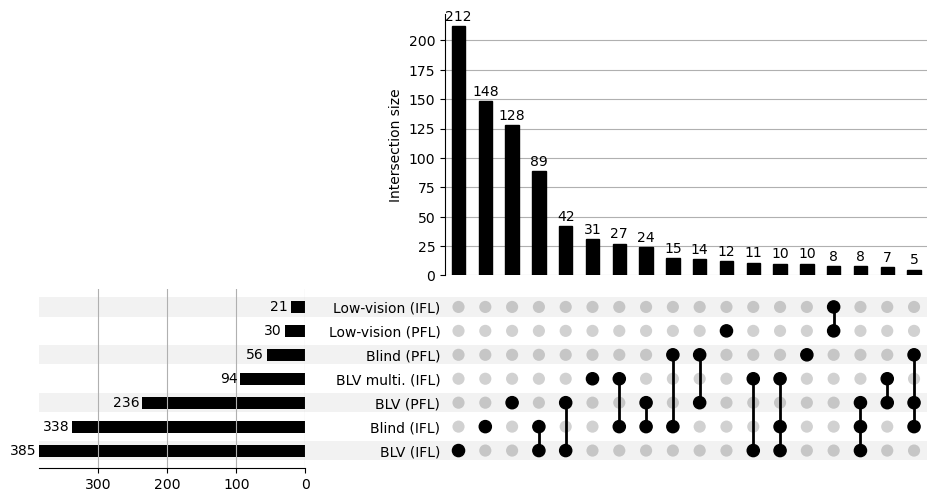

In [21]:
import os
from dataset_analysis.analyzer_utils import regexp_counter_analysis
from dataset_analysis.filtering.dataset_filter_processor import DatasetFilterProcessor

ROOT_PATH = os.getcwd()

# Input paths (must exists)
PRIV_DATASET_PATH = os.path.join(ROOT_PATH, 'data/private/dataset_N880.xlsx')
# Output paths
OUT_MENTION_BLV_CROSSTAB = os.path.join(ROOT_PATH, 'data/private/analysis/community_of_focus/mentionBLV_crosstab.xlsx')
OUT_NO_MENTION_BLV = os.path.join(ROOT_PATH, 'data/private/analysis/community_of_focus/no-mentionBLV.xlsx')
EXCLUDED_DOI_FILEPATH = os.path.join(ROOT_PATH, 'data/private/analysis/community_of_focus/excluded-doi.xlsx')
FIG_FOLDER_PATH = os.path.join(ROOT_PATH, 'data/private/analysis/community_of_focus/')
FIG_NAME = 'BLV_terms_TAK'

# Important to respect a matching order with a OR condition
#  Because order matters, englobing expressions must be placed first.
REGEXP_POPULATION_SEARCH_TERMS = [
    ('BLV_MULTI_IFL',  r'((?:\S*? )?(?:blind (?:and|or) (?:vis\w*|low|partial\w*)[ |-](?:\w*))(?: (?:child(?:ren)?|(?:software )?developers?|designers?|individuals?|learners?|participants?|pedestrians?|people|persons?|population|programmer?|pupils?|students?|subjects?|users?)|(?:[,|.|?])))'),
    ('BLV_IFL',  r'(?:((?:the vis\w*[ |-]impaired[,|.|?])|(?:(?:vis\w*[ |-](?:impaired|challenged|disabled)) (?:child(?:ren)?|(?:software )?developers?|designers?|individuals?|learners?|participants?|pedestrians?|people|persons?|population|programmer?|pupils?|students?|subjects?|users?))))'),
    ('BLV_PFL',  r'((?:child(?:ren)?|(?:software )?developers?|designers?|individuals?|learners?|participants?|pedestrians?|people|persons?|population|programmer?|pupils?|students?|subjects?|those|users?) (?:(?:with|who\sare|who\shave) (?:vis[a-z-]* impair[a-z-]*|vis[a-z-]* disabilit[a-z-]*|vision loss|mixed visual abilit[a-z-]*)))'),
    ('B_IFL',   r'(?:((?:blind) ?(?:child(?:ren)?|(?:software )?developers?|designers?|individuals?|learners?|participants?|pedestrians?|people|persons?|population|programmer?|pupils?|students?|subjects?|users?))|(the blind(?:[,|.|?]) ?(?:\w* \w*)?))'),
    ('B_PFL',   r'(?:(?:child(?:ren)?|(?:software )?developers?|designers?|individuals?|learners?|participants?|pedestrians?|people|persons?|population|programmer?|pupils?|students?|subjects?|those|users?)(?:(?:[\s]with[\s]blindness)|(?:[\s]who are blind)))'),
    ('LV_IFL',  r'((?:\S*? )?(?:low[\s|-]vision|partially sighted) (?:child(?:ren)?|(?:software )?developers?|designers?|individuals?|learners?|participants?|pedestrians?|people|persons?|population|programmer?|pupils?|students?|subjects?|users?))'),
    ('LV_PFL',  r'((?:child(?:ren)?|(?:software )?developers?|designers?|individuals?|learners?|participants?|pedestrians?|people|persons?|population|programmer?|pupils?|students?|subjects?|those|users?) (?:(?:with|who have)(?:[\s]low[\s|-]vision)))'),
]

# Mapping table to rename groups that have naming limitations
RENAME_POPULATION_DICT = {
    'BLV_MULTI_IFL': 'BLV multi. (IFL)',
    'BLV_IFL': 'BLV (IFL)',
    'BLV_PFL': 'BLV (PFL)',
    'B_IFL': 'Blind (IFL)',
    'B_PFL': 'Blind (PFL)',
    'LV_IFL': 'Low-vision (IFL)',
    'LV_PFL': 'Low-vision (PFL)',
}

SEARCH_IN = 'TAK'

# No filtering
filter = DatasetFilterProcessor(scopus_dataset=PRIV_DATASET_PATH, predefined_filters=[])
filter.process()
print(filter.summary())

regexp_counter_analysis(df=filter.get_df(),
                        keywords_search_spec=REGEXP_POPULATION_SEARCH_TERMS,
                        search_in=SEARCH_IN,
                        out_filepath=OUT_MENTION_BLV_CROSSTAB,
                        excluded_out_filepath=OUT_NO_MENTION_BLV,
                        figname=FIG_NAME,
                        fig_folder_path=FIG_FOLDER_PATH,
                        rename_dict=RENAME_POPULATION_DICT)

## Technological Trends

### Public

In [22]:
import os
import pandas as pd
from dataset_analysis.analyzer_utils import temporal_analyzer_from_crosstab

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 500)

ROOT_PATH = os.getcwd()

PUB_DOI_YEAR_PATH = os.path.join(ROOT_PATH, 'data/results/analysis/technological_trends/doi_year.xlsx')
PUB_OCCURRENCES_PATH = os.path.join(ROOT_PATH, 'data/results/analysis/technological_trends/mentionTECH_crosstab_complete.xlsx')
FIG_FOLDER_PATH = os.path.join(ROOT_PATH, 'data/results/analysis/technological_trends/')
FIG_NAME = 'technology-year-norm-linedplots'

# From-to relation
RENAME_TECH_DICT = {
    'Artificial_Intelligence': 'Artificial Intelligence',
    'Computer_Vision': 'Computer Vision',
    'Mobile': 'Mobile',
    'Augmented_Virtual_Mixed_Reality': 'Augmented/Virtual/Mixed Reality',
    'Navigation_Assistance': 'Navigation Assistance',
    'Wearable': 'Wearable',
    'Web': 'Web'
}

doi_year_df = pd.read_excel(PUB_DOI_YEAR_PATH)
keyword_occurences_df = pd.read_excel(PUB_OCCURRENCES_PATH)
temporal_analyzer_from_crosstab(doi_year_df=doi_year_df,
                                keyword_occurrence_df=keyword_occurences_df,
                                figname_no_ext=FIG_NAME,
                                fig_folder_path=FIG_FOLDER_PATH,
                                rename_dict=RENAME_TECH_DICT,
                                plot_width=600,
                                plot_height=1200)

Year                                 2010      2011      2012      2013  2014      2015      2016      2017      2018      2019      2020      2021      2022
keyword                                                                                                                                                      
Artificial_Intelligence          0.017544  0.000000  0.000000  0.030769  0.04  0.000000  0.049180  0.093333  0.082353  0.185185  0.163636  0.176471  0.151899
Augmented_Virtual_Mixed_Reality  0.017544  0.039216  0.041667  0.030769  0.00  0.090909  0.032787  0.053333  0.047059  0.061728  0.100000  0.070588  0.101266
Computer_Vision                  0.070175  0.156863  0.125000  0.184615  0.08  0.151515  0.147541  0.186667  0.141176  0.185185  0.145455  0.200000  0.215190
Mobile                           0.263158  0.294118  0.375000  0.323077  0.24  0.242424  0.524590  0.240000  0.223529  0.197531  0.218182  0.200000  0.151899
Navigation_Assistance            0.175439  0.039216 

### Private

In [23]:
import os
from dataset_analysis.analyzer_utils import temporal_analyzer
from dataset_analysis.filtering.dataset_filter_processor import DatasetFilterProcessor

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 500)

ROOT_PATH = os.getcwd()

# Input paths (must exist)
PRIV_DATASET_PATH = os.path.join(ROOT_PATH, 'data/private/dataset_N880.xlsx')
# Output
OUT_MENTION_TECH_CROSSTAB = os.path.join(ROOT_PATH, 'data/private/analysis/technological_trends/mentionTECH_crosstab.xlsx')
OUT_NO_MENTION_TECH = os.path.join(ROOT_PATH, 'data/private/analysis/technological_trends/no-mentionTECH.xlsx')
EXCLUDED_DOI_FILEPATH = os.path.join(ROOT_PATH, 'data/private/analysis/technological_trends/excluded-doi.xlsx')
FIG_FOLDER_PATH = os.path.join(ROOT_PATH, 'data/private/analysis/technological_trends/')
FIG_NAME = 'technology-year-norm-linedplots'

# Important to respect a matching order with a OR condition
REGEXP_COMPUTER_TERMS = [
    ('Artificial_Intelligence',  r'(?:(?:\w* ?){0,3}(?:artificial intelligence|machine learning|deep learning|convolutional neural network) ?(?:\w* ?){1,3})'),
    ('Computer_Vision',  r'(?:(?:\w* ?){0,3}(?:computer vision|object detection|object recognition) ?(?:\w* ?){1,3})'),
    ('Mobile',  r'(?:(?:\w* ?){0,3}(?:mobile|smartphone) ?(?:\w* ?){1,3})'),
    ('Augmented_Virtual_Mixed_Reality',  r'(?:(?:\w* ?){0,3}(?:augmented reality|virtual reality|mixed reality) ?(?:\w* ?){1,3})'),
    ('Navigation_Assistance',  r'(?:(?:\w* ?){0,3}(?:navigation system|electronic travel aid) ?(?:\w* ?){1,3})'),
    ('Wearable',  r'(?:(?:\w* ?){0,3}(?:wearable|smartwatch) ?(?:\w* ?){1,3})'),
    ('Web',  r'(?:(?:\w* ?){0,3}(?:web|browser) ?(?:\w* ?){1,3})')
]

# From-to relation
RENAME_TECH_DICT = {
    'Artificial_Intelligence': 'Artificial Intelligence',
    'Computer_Vision': 'Computer Vision',
    'Mobile': 'Mobile',
    'Augmented_Virtual_Mixed_Reality': 'Augmented/Virtual/Mixed Reality',
    'Navigation_Assistance': 'Navigation Assistance',
    'Wearable': 'Wearable',
    'Web': 'Web',
}

SEARCH_IN = 'TAK'

# No filtering made on this dataset
filter = DatasetFilterProcessor(scopus_dataset=PRIV_DATASET_PATH, predefined_filters=[])
filter.process()
print(filter.summary())

temporal_analyzer(df=filter.get_df(),
                  keywords_search_spec=REGEXP_COMPUTER_TERMS,
                  search_in=SEARCH_IN,
                  out_filepath=OUT_MENTION_TECH_CROSSTAB,
                  excluded_out_filepath=OUT_NO_MENTION_TECH,
                  fig_folder_path=FIG_FOLDER_PATH,
                  figname_no_ext=FIG_NAME,
                  rename_dict=RENAME_TECH_DICT,
                  plot_width=600,
                  plot_height=1200)

                  operation       type  nb rows
0              Load dataset        N/A      880
1       Remove N/A abstract  automatic        0
2     Remove N/A references  automatic        0
3  Remove N/A document type  automatic        0
4            Export dataset        N/A      880
Patterns: (?P<Artificial_Intelligence>(?:(?:\w* ?){0,3}(?:artificial intelligence|machine learning|deep learning|convolutional neural network) ?(?:\w* ?){1,3}))|(?P<Computer_Vision>(?:(?:\w* ?){0,3}(?:computer vision|object detection|object recognition) ?(?:\w* ?){1,3}))|(?P<Mobile>(?:(?:\w* ?){0,3}(?:mobile|smartphone) ?(?:\w* ?){1,3}))|(?P<Augmented_Virtual_Mixed_Reality>(?:(?:\w* ?){0,3}(?:augmented reality|virtual reality|mixed reality) ?(?:\w* ?){1,3}))|(?P<Navigation_Assistance>(?:(?:\w* ?){0,3}(?:navigation system|electronic travel aid) ?(?:\w* ?){1,3}))|(?P<Wearable>(?:(?:\w* ?){0,3}(?:wearable|smartwatch) ?(?:\w* ?){1,3}))|(?P<Web>(?:(?:\w* ?){0,3}(?:web|browser) ?(?:\w* ?){1,3}))
keyword      